In [1]:
from __future__ import annotations

import numpy as np
from matplotlib import pyplot as plt

from multinterp.unstructured._gpytorch import GaussianProcessRegression

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def function_1(x, y):
    return x * (1 - x) * np.cos(4 * np.pi * x) * np.sin(4 * np.pi * y**2) ** 2

In [3]:
rng = np.random.default_rng(0)
rand_x, rand_y = rng.random((2, 1000))
values = function_1(rand_x, rand_y)

In [4]:
grid_x, grid_y = np.meshgrid(
    np.linspace(0, 1, 100),
    np.linspace(0, 1, 100),
    indexing="ij",
)

In [5]:
interp = GaussianProcessRegression(
    values.astype("float32"),
    (rand_x.astype("float32"), rand_y.astype("float32")),
)
new_grid = interp(grid_x.astype("float32"), grid_y.astype("float32"))

/mnt/c/Users/alujan/GitHub/alanlujan91/multinterp/src/multinterp/grids.py:99: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1712608847532/work/torch/csrc/utils/tensor_new.cpp:274.)
  self.grids = BACKEND_MODULES[backend].asarray(grids)
/home/alujan/micromamba/envs/multinterp-dev/lib/python3.12/site-packages/torch/nn/parallel/data_parallel.py:33: UserWarning: 
    There is an imbalance between your GPUs. You may want to exclude GPU 1 which
    has less than 75% of the memory or cores of GPU 0. You can do so by setting
    the device_ids argument to DataParallel, or by setting the CUDA_VISIBLE_DEVICES
    environment variable.
  warnings.warn(imbalance_warn.format(device_ids[min_pos], device_ids[max_pos]))


Iter 1/50 - Loss: -1.130   lengthscale: 0.754   noise: 0.009
Iter 11/50 - Loss: -1.722   lengthscale: 0.103   noise: 0.000
Convergence reached!


/mnt/c/Users/alujan/GitHub/alanlujan91/multinterp/src/multinterp/unstructured/_gpytorch.py:179: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1712608847532/work/aten/src/ATen/native/TensorShape.cpp:3675.)
  ).T


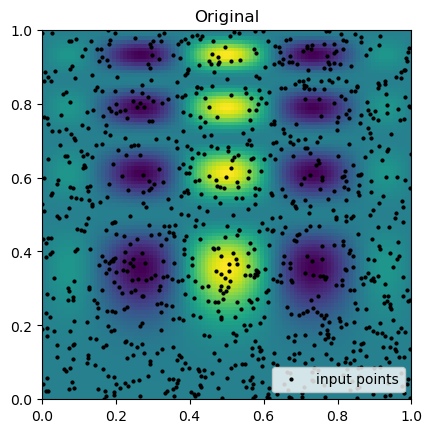

In [6]:
plt.imshow(function_1(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin="lower")
plt.plot(rand_x, rand_y, "ok", ms=2, label="input points")
plt.title("Original")
plt.legend(loc="lower right")

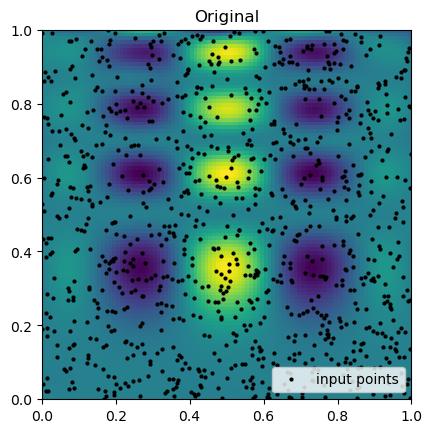

In [7]:
plt.imshow(new_grid.mean.cpu(), extent=(0, 1, 0, 1), origin="lower")
plt.plot(rand_x, rand_y, "ok", ms=2, label="input points")
plt.title("Original")
plt.legend(loc="lower right")